In [ ]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.datasets import load_iris

## Carregando os dados e preparando os dados

In [ ]:
data = load_iris()
dados = data.data
target = data.target

In [ ]:
dataframe = pd.DataFrame(dados,columns= ['Sepal-Length','Sepal-Width','Petal-Length','Petal-Width'])
dataframe['Especie'] = target
dataframe

,Sepal-Length,Sepal-Width,Petal-Length,Petal-Width,Especie
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
def enconde_species(specie):
  if specie == 0 :
    return 'Setosa'
  elif specie == 1:
    return 'Versicolor'
  elif specie == 2:
    return 'Virginica'

dataframe.Especie = dataframe.Especie.apply(enconde_species)

In [ ]:
dataframe.describe()

,Sepal-Length,Sepal-Width,Petal-Length,Petal-Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Pré processamento

Existem outliers?

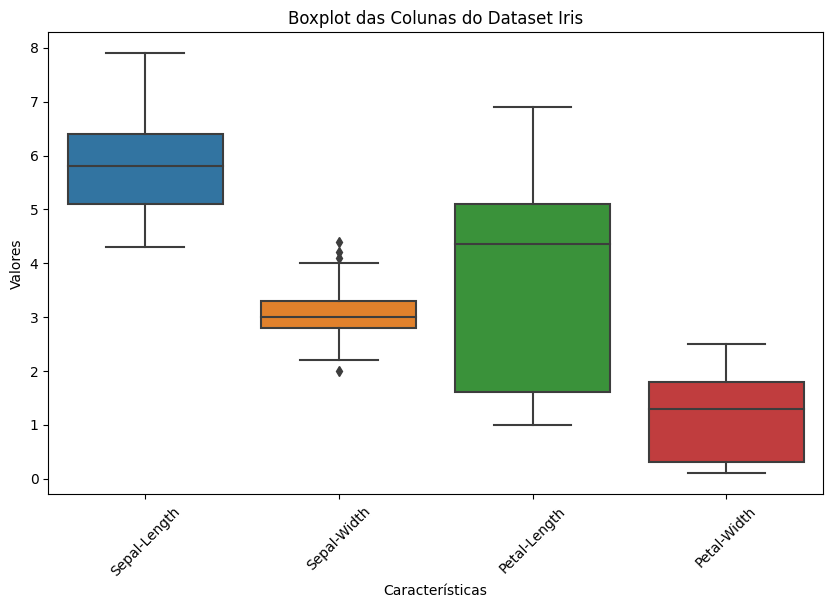

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataframe[['Sepal-Length',	'Sepal-Width',	'Petal-Length',	'Petal-Width']])
plt.title('Boxplot das Colunas do Dataset Iris')
plt.xlabel('Características')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.show()

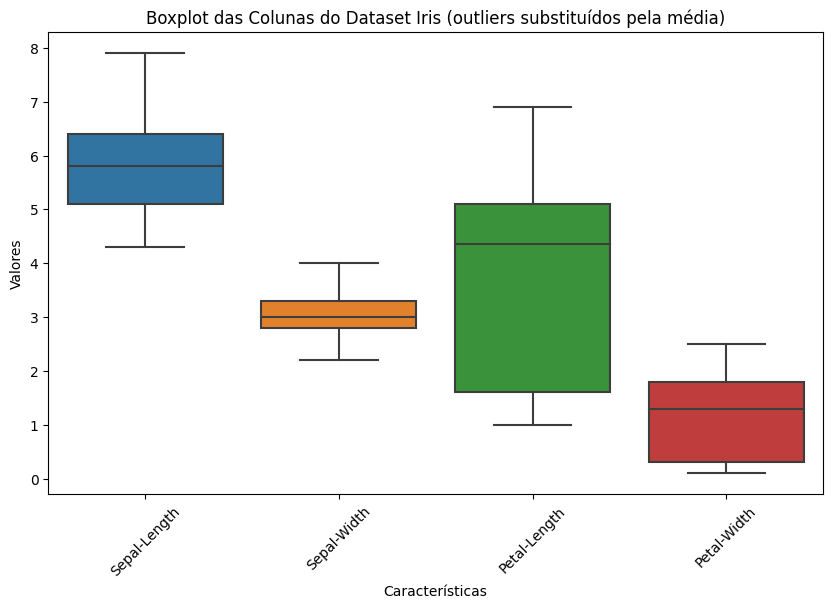

In [ ]:
Q1 = dataframe[['Sepal-Length', 'Sepal-Width', 'Petal-Length', 'Petal-Width']].quantile(0.25)
Q3 = dataframe[['Sepal-Length', 'Sepal-Width', 'Petal-Length', 'Petal-Width']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for col in ['Sepal-Length', 'Sepal-Width', 'Petal-Length', 'Petal-Width']:
    is_outlier = (dataframe[col] < lower_bound[col]) | (dataframe[col] > upper_bound[col])
    dataframe.loc[is_outlier, col] = dataframe[col].mean()


plt.figure(figsize=(10, 6))
sns.boxplot(data=dataframe[['Sepal-Length', 'Sepal-Width', 'Petal-Length', 'Petal-Width']])
plt.title('Boxplot das Colunas do Dataset Iris (outliers substituídos pela média)')
plt.xlabel('Características')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.show()

Transformando colunas categóricas em numéricas

Nosso dataset para treinamento não pode ter strings, é necessário transformar nossa colunas de especie em valores numericos. Vamos aplicar uma técnica que é conhecida como label enconde.

In [ ]:
def label_encoder(specie):
  if specie == 'Setosa':
    return 0
  elif specie == 'Versicolor':
    return 1
  elif specie == 'Virginica':
    return 2

dataframe.Especie = dataframe.Especie.apply(label_encoder)

In [ ]:
dataframe.tail()

,Sepal-Length,Sepal-Width,Petal-Length,Petal-Width,Especie
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


Outra técnica que devemos aplicar é escalonar nossos dados, algoritmos de inteligência artificial normalmente trabalham melhor com dados escalonados. Isso se deve ao fator de que colunas diferentes, com escalonamentos diferentes podem divergir de peso durante um treinamento.

In [ ]:
def manual_min_max_scaler(column):
    min_value = column.min()
    max_value = column.max()
    scaled_column = (column - min_value) / (max_value - min_value)
    return scaled_column

dataframe['Sepal-Length'] = manual_min_max_scaler(dataframe['Sepal-Length'])
dataframe['Sepal-Width'] = manual_min_max_scaler(dataframe['Sepal-Width'])
dataframe['Petal-Length'] = manual_min_max_scaler(dataframe['Petal-Length'])
dataframe['Petal-Width'] = manual_min_max_scaler(dataframe['Petal-Width'])

In [ ]:
dataframe

,Sepal-Length,Sepal-Width,Petal-Length,Petal-Width,Especie
0,0.222222,0.722222,0.067797,0.041667,0
1,0.166667,0.444444,0.067797,0.041667,0
2,0.111111,0.555556,0.050847,0.041667,0
3,0.083333,0.500000,0.084746,0.041667,0
4,0.194444,0.777778,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.444444,0.711864,0.916667,2
146,0.555556,0.166667,0.677966,0.750000,2
147,0.611111,0.444444,0.711864,0.791667,2
148,0.527778,0.666667,0.745763,0.916667,2


## Hora do treinamento
1° Passo: Separar em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split
X = dataframe.drop('Especie',axis=1)
y = dataframe['Especie'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
print(X_train.shape, y_train.shape)

(120, 4) (120,)


## Seleção de algoritmos
vamos usar:
 - Árvore de decisão
 - MultiLayer Perceptron (Rede neural)

### Árvore de decisão
Algoritmo de classificação com estrutura de dados de árvore

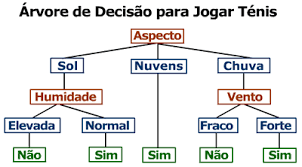

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(max_depth=2)

In [ ]:
clf.predict([[2, 3 , 0.5 , 2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])

### Mas como nosso modelo esta perfomando? Precisamos usar a base de teste.

In [ ]:
y_hat = clf.predict(X_test)
y_hat

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: Especie, dtype: int64

## Vamos aprender um pouco sobre as métricas para avaliação de modelos de classificação
- Matriz de confusão:Representação gráfica das predições e erros do modelo.

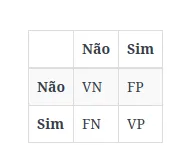


- Acurácia: Indica a performance Geral do modelo
- Precisão: Dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas.
  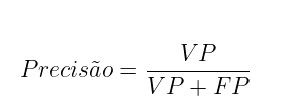
- Recall (Revocação): dentre todas as situações de classe Negativo como valor esperado, quantas estão corretas;
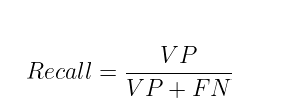

Fonte das imagens: https://medium.com/data-hackers/indo-al%C3%A9m-da-acur%C3%A1cia-entendo-a-acur%C3%A1cia-balanceada-precis%C3%A3o-recall-e-f1-score-c895e55a9753

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
acc = accuracy_score(y_test,y_hat)
precision = precision_score(y_test,y_hat,average=None)
recall = recall_score(y_test,y_hat, average = None)
print(f'Accuracia: {acc},\n Precision: {precision},\n Recall: {recall} \n')

Accuracia: 0.9666666666666667,
 Precision: [1.         1.         0.91666667],
 Recall: [1.         0.88888889 1.        ] 



In [ ]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test, y_hat,)
conf_mx

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

<Axes: >

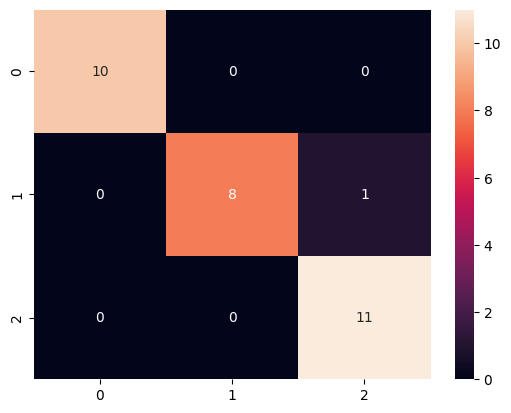

In [ ]:
sns.heatmap(conf_mx,annot=True)

Métodos de treinamento
- HoldOut
- Kfold
- Leave one out


## Aplicando o Kfold

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3,shuffle= True, random_state= 42)
kf.get_n_splits(X)

3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
scores=[]
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(train_index, test_index)
    X_train = X.iloc[train_index]
    y_train =  y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

[  0   1   2   3   5   6   7   8  13  14  17  20  21  23  24  25  28  33
  34  35  37  38  39  40  41  43  44  46  47  48  49  50  52  53  54  57
  58  59  60  61  62  63  66  67  70  71  72  74  77  79  80  83  84  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 105 106
 107 111 112 113 114 115 116 117 119 120 121 122 123 124 125 126 129 130
 134 135 136 138 139 140 144 147 148 149] [  4   9  10  11  12  15  16  18  19  22  26  27  29  30  31  32  36  42
  45  51  55  56  64  65  68  69  73  75  76  78  81  82  85  86 104 108
 109 110 118 127 128 131 132 133 137 141 142 143 145 146]
[  1   2   3   4   6   9  10  11  12  14  15  16  17  18  19  20  21  22
  26  27  29  30  31  32  36  37  38  41  42  45  46  48  50  51  52  54
  55  56  57  58  59  61  63  64  65  68  69  71  72  73  74  75  76  78
  79  81  82  85  86  87  88  90  91  92  99 100 102 103 104 106 107 108
 109 110 112 115 116 118 121 124 126 127 128 129 130 131 132 133 136 137
 139 140 141 142 143 144

In [ ]:
scores

[0.98, 0.92, 0.94]

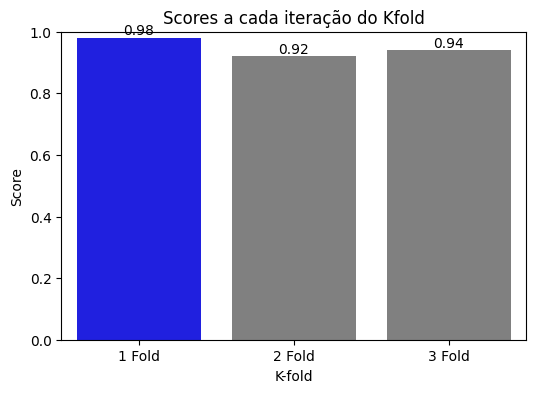

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

indice_maior_score = scores.index(max(scores))

plt.figure(figsize=(6, 4))
bar_colors = ['grey'] * len(scores)
bar_colors[indice_maior_score] = 'blue'
ax = sns.barplot(x=[0, 1, 2], y=scores, palette=bar_colors)

for i, score in enumerate(scores):
    ax.text(i, score + 0.01, f'{score:.2f}', ha='center')

plt.title('Scores a cada iteração do Kfold')
plt.xlabel('K-fold')
plt.ylabel('Score')
plt.xticks(range(len(scores)), labels=['1 Fold', '2 Fold', '3 Fold'])
plt.ylim(0, 1)
plt.show()


### Pontos positivos
Custo Computacional Mais Gerenciável: Embora a validação cruzada k-fold envolva mais iterações do que uma única divisão entre treinamento e teste, é mais computacionalmente eficiente do que o Leave-One-Out, especialmente em conjuntos de dados maiores.

Robustez contra Outliers: A validação cruzada k-fold é mais robusta contra pontos de dados atípicos (outliers) em comparação com o Leave-One-Out, porque cada ponto de dados é utilizado em várias iterações e não tem um impacto desproporcional em um único teste.

### Leave one out

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
import numpy as np

loo = LeaveOneOut()
scores = []
clf = KNeighborsClassifier(n_neighbors=3)

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

average_accuracy = np.mean(scores)
print("Average Accuracy:", average_accuracy)


Average Accuracy: 0.96


### Pontos positivos
- Avaliação de Desempenho Rigorosa: O LOO fornece uma avaliação extremamente rigorosa do desempenho do modelo. Cada ponto de dados no conjunto de treinamento é usado uma vez como conjunto de teste, o que reduz a possibilidade de viés no resultado.
- Aproveitamento Máximo dos Dados: Em um conjunto de dados pequeno, o LOO garante que você esteja tirando o máximo proveito possível de cada ponto de dados. Isso é crucial quando os dados são escassos e cada amostra é valiosa.

### Ponto negativo
- Alto custo computacional